# Simulated Method of Moments (SMM) Estimation
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), February 2020
The code in this Jupyter notebook was written using Python 3.7. It also uses data file `Econ381totpts.txt` and the image file `MLEplots.png`. This data file and image file are stored along with the Jupyter notebook file `SMMest.ipynb` in the public GitHub repository [https://github.com/rickecon/Notebooks/tree/master/SMM](https://github.com/rickecon/Notebooks/tree/master/SMM).

For teaching and learning purposes, it is best to clear all cell output by selecting `Cell` then `All Output` then `Clear` from the menu across the top of this notebook. However, this notebook comes with all the cells' output displayed.

## 1. The SMM estimator
Simulated method of moments (SMM) is analogous to the generalized method of moments (GMM) estimator. SMM could really be thought of as a particular type of GMM estimator. The SMM estimator chooses model parameters $\theta$ to make simulated model moments match data moments. Seminal papers developing SMM are McFadden (1989), Lee and Ingram (1991), and Duffie and Singleton (1993). Good textbook treatments of SMM are found in Adda and Cooper (2003, pp. 87-100) and Davidson and MacKinnon (2004, pp. 383-394).

In ML estimation, we used data $x$ and model parameters $\theta$ to maximize the likelihood of drawing that data $x$ from the model given parameters $\theta$.

$$ \hat{\theta}_{ML} = \theta:\quad \max_{\theta}\ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr) $$

In GMM estimation, we used data $x$ and model parameters $\theta$ to minimize the distance between model moments $m(x|\theta)$ and data moments $m(x)$.

$$ \hat{\theta}_{GMM} = \theta:\quad \min_{\theta}||m(x|\theta) - m(x)|| $$

The following difficulties can arise with GMM making it not possible or very difficult.

* The model moment function $m(x|\theta)$ is not known analytically.
* The data moments you are trying to match come from another model (indirect inference).
* The model moments $m(x|\theta)$ are derived from *latent variables* that are not observed by the modeler. You only have moments, not the underlying data. See Laroque and Salanie (1993).
* The model moments $m(x|\theta)$ are derived from *censored variables* that are only partially observed by the modeler.
* The model moments $m(x|\theta)$ are just difficult to derive analytically. Examples include moments that include multiple integrals over nonlinear functions as in McFadden (1989).

SMM estimation is simply to simulate the model data $S$ times, and use the average values of the moments from the simulated data as the estimator for the model moments. Let $\tilde{x}=\{\tilde{x}_1,\tilde{x}_2,...\tilde{x}_s,...\tilde{x}_S\}$ be the $S$ simulations of the model data.  

$$ \hat{m}\left(\tilde{x}|\theta\right) = \frac{1}{S}\sum_{s=1}^S m\left(\tilde{x}_s|\theta\right) $$

Once we have an estimate of the model moments $\hat{m}\left(\tilde{x}|\theta\right)$ from our $S$ simulations, SMM estimation is very similar to our presentation of GMM. The SMM approach of estimating the parameter vector $\hat{\theta}_{SMM}$ is to choose $\theta$ to minimize some distance measure of the data moments $m(x)$ from the simulated model moments $\hat{m}(\tilde{x}|\theta)$.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\: ||\hat{m}(\tilde{x}|\theta)-m(x)|| $$

The distance measure $||\hat{m}(\tilde{x}|\theta)-m(x)||$ can be any kind of norm. But it is important to recognize that your estimates $\hat{\theta}_{SMM}$ will be dependent on what distance measure (norm) you choose. The most widely studied and used distance metric in GMM and SMM estimation is the $L^2$ norm or the sum of squared errors in moments. Define the moment error function $e(\tilde{x},x|\theta)$ as the percent difference in the vector of simulated model moments from the data moments.

$$ e(\tilde{x},x|\theta) \equiv \frac{\hat{m}(\tilde{x}|\theta)-m(x)}{m(x)} \quad\text{or}\quad \hat{m}(\tilde{x}|\theta)-m(x) $$

It is important that the error function $e(\tilde{x},x|\theta)$ be a percent deviation of the moments (given that none of the data moments are 0). This puts all the moments in the same units, which helps make sure that no moments receive unintended weighting simply due to its units. This ensures that the problem is scaled properly and will suffer from as little as possible ill conditioning.

In this case, the SMM estimator is the following,

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, W \, e(\tilde{x},x|\theta) $$

where $W$ is a $R\times R$ weighting matrix in the criterion function. For now, think of this weighting matrix as the identity matrix. But we will show in Section 2 a more optimal weighting matrix. We call the quadratic form expression $e(\tilde{x},x|\theta)^T \, W \, e(\tilde{x},x|\theta)$ the *criterion function* because it is a strictly positive scalar that is the object of the minimization in the SMM problem statement. The $R\times R$ weighting matrix $W$ in the criterion function allows the econometrician to control how each moment is weighted in the minimization problem. For example, an $R\times R$ identity matrix for $W$ would give each moment equal weighting, and the criterion function would be a simply sum of squared percent deviations (errors). Other weighting strategies can be dictated by the nature of the problem or model.

One last item to emphasize with SMM, which we will highlight in the examples in this notebook, is that the errors that are drawn for the $S$ simulations of the model must be drawn only once so that the minimization problem for $\hat{\theta}_{SMM}$ does not have the underlying sampling changing for each guess of a value of $\theta$. Put more simply, you want the random draws for all the simulations to be held constant so that the only thing changing in the minimization problem is the value of the vector of parameters $\theta$.

## 2. The Weighting Matrix (W)
In the SMM criterion function in the problem statement above, some weighting matrices $W$ produce precise estimates while others produce poor estimates with large variances. We want to choose the optimal weighting matrix $W$ with the smallest possible asymptotic variance. This is an efficient or optimal SMM estimator. The optimal weighting matrix is the inverse variance covariance matrix of the moments at the optimal moments,

$$ W^{opt} \equiv \Omega^{-1}(\tilde{x},x|\hat{\theta}_{SMM}) $$

where $\Omega(\tilde{x},x|\theta)$ is the variance covariance matrix of the moment condition errors $e(\tilde{x},x|\theta)$. The intuition for using the inverse variance covariance matrix $\Omega^{-1}$ as the optimal weighting matrix is the following. You want to downweight moments that have a high variance, and you want to weight more heavily the moments that are generated more precisely.

Notice that this definition of the optimal weighting matrix is circular. $W^{opt}$ is a function of the SMM estimates $\hat{\theta}_{SMM}$, but the optimal weighting matrix is used in the estimation of $\hat{\theta}_{SMM}$. This means that one has to use some kind of iterative fixed point method to find the true optimal weighting matrix $W^{opt}$. Below are some examples of weighting matrices to use.

### 2.1. The identity matrix (W = I)
Many times, you can get away with just using the identity matrix as your weighting matrix $W = I$. This changes the criterion function to a simple sum of squared error functions such that each moment has the same weight.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, e(\tilde{x},x|\theta) $$

If the problem is well conditioned and well identified, then your SMM estimates $\hat{\theta}_{SMM}$ will not be greatly affected by this simplest of weighting matrices.

### 2.2. Two-step variance covariance estimator of W
The most common method of estimating the optimal weighting matrix for SMM estimates is the two-step variance covariance estimator. The name "two-step" refers to the two steps used to get the weighting matrix.

The first step is to estimate the SMM parameter vector $\hat{\theta}_{1,SMM}$ using the simple identity matrix as the weighting matrix $W = I$.

$$ \hat{\theta}_{1,SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, I \, e(\tilde{x},x|\theta) $$

Because we are simulating data, we can generate an estimator for the variance covariance matrix of the moment error vector $\hat{\Omega}$ using just the simulated data moments and the data moments. This $E(\tilde{x},x|\theta)$ matrix represents the contribution of the $s$th simulated moment to the $r$th moment error. Define $E(\tilde{x},x|\theta)$ as the $R\times S$ matrix of moment error functions from each simulation.

$$ E(\tilde{x},x|\theta) =
  \begin{bmatrix}
    m_1(\tilde{x}_1|\theta) - m_1(x) & m_1(\tilde{x}_2|\theta) - m_1(x) & ... & m_1(\tilde{x}_S|\theta) - m_1(x) \\
    m_2(\tilde{x}_1|\theta) - m_2(x) & m_2(\tilde{x}_2|\theta) - m_2(x) & ... & m_2(\tilde{x}_S|\theta) - m_2(x) \\
    \vdots & \vdots & \ddots & \vdots \\
    m_R(\tilde{x}_1|\theta) - m_R(x) & m_R(\tilde{x}_2|\theta) - m_R(x) & ... & m_R(\tilde{x}_S|\theta) - m_R(x) \\
  \end{bmatrix} $$

where $m_r(x)$ is the $r$th data moment which is constant across each row, and $m_r(\tilde{x}_s|\theta)$ is the $r$th model moment from the $s$th simulation which are changing across each row. When the errors are percent deviations, the $E(\tilde{x},x|\theta)$ matrix is the following.

$$ E(\tilde{x},x|\theta) =
  \begin{bmatrix}
    \frac{m_1(\tilde{x}_1|\theta) - m_1(x)}{m_1(x)} & \frac{m_1(\tilde{x}_2|\theta) - m_1(x)}{m_1(x)} & ... & \frac{m_1(\tilde{x}_S|\theta) - m_1(x)}{m_1(x)} \\
    \frac{m_2(\tilde{x}_1|\theta) - m_2(x)}{m_2(x)} & \frac{m_2(\tilde{x}_2|\theta) - m_2(x)}{m_2(x)} & ... & \frac{m_2(\tilde{x}_S|\theta) - m_2(x)}{m_2(x)} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{m_R(\tilde{x}_1|\theta) - m_R(x)}{m_R(x)} & \frac{m_R(\tilde{x}_2|\theta) - m_R(x)}{m_R(x)} & ... & \frac{m_R(\tilde{x}_S|\theta) - m_R(x)}{m_R(x)} \\
  \end{bmatrix} $$

where the denominator of the percentage deviation or baseline is the model moment that does not change. We use the $E(\tilde{x},x|\theta)$ data matrix and the Step 1 SMM estimate $e(x|\hat{\theta}_{1,SMM})$ to get a new estimate of the variance covariance matrix.

$$ \hat{\Omega}_2 = \frac{1}{S}E(\tilde{x},x|\hat{\theta}_{1,SMM})\,E(\tilde{x},x|\hat{\theta}_{1,SMM})^T $$
  
This is simply saying that the $(r,s)$-element of the estimator of the variance-covariance matrix of the moment vector is the following.

$$\hat{\Omega}_{r,s} = \frac{1}{S}\sum_{i=1}^S\Bigl[m_r(\tilde{x}_i|\theta) - m_{r}(x)\Bigr]\Bigl[ m_s(\tilde{x}_i|\theta) - m_s(x)\Bigr] $$

The optimal weighting matrix is the inverse of the two-step variance covariance matrix.

$$ \hat{W}^{two-step} \equiv \hat{\Omega}_2^{-1} $$

Lastly, re-estimate the SMM estimator using the optimal two-step weighting matrix.

$$ \hat{\theta}_{2,SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, \hat{W}^{two-step} \, e(\tilde{x},x|\theta) $$

$\hat{\theta}_{2, SMM}$ is called the two-step SMM estimator.

### 2.3. Iterated variance covariance estimator of W
The truly optimal weighting matrix $W^{opt}$ is the iterated variance-covariance estimator of $W$. This procedure is to just repeat the process described in the two-step SMM estimator until the estimated weighting matrix no longer changes between iterations. Let $i$ index the $i$th iterated SMM estimator,

$$ \hat{\theta}_{i, SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, \hat{W}_{i} \, e(\tilde{x},x|\theta) $$

and the $i+1$th estimate of the optimal weighting matrix is defined as the following.

$$ \hat{W}_{i+1} \equiv \hat{\Omega}_{i+1} = \frac{1}{S}E(\tilde{x},x|\hat{\theta}_{i,SMM})\,E(\tilde{x},x|\hat{\theta}_{i,SMM})^T $$

The iterated SMM estimator is the $\hat{\theta}_{i,SMM}$ such that $\hat{W}_{i+1}$ is very close to $\hat{W}_{i}$ for some distance metric (norm).

$$ \hat{\theta}_{it,SMM} = \hat{\theta}_{i,SMM}: \quad || \hat{W}_{i+1} - \hat{W}_{i} || < \varepsilon $$

### 2.4. Newey-West consistent estimator of $\Omega$ and W
The Newey-West estimator of the optimal weighting matrix and variance covariance matrix is consistent in the presence of heteroskedasticity and autocorrelation in the data (See Newey and West, 1987). Adda and Cooper (2003, p. 82) have a nice exposition of how to compute the Newey-West weighting matrix $\hat{W}_{nw}$. The asymptotic representation of the optimal weighting matrix $\hat{W}^{opt}$ is the following:

$$ \hat{W}^{opt} = \lim_{S\rightarrow\infty}\frac{1}{S}\sum_{i=1}^S \sum_{l=-\infty}^\infty E(\tilde{x}_i,x|\theta)E(\tilde{x}_{i-l},x|\theta)^T $$

The Newey-West consistend estimator of $\hat{W}^{opt}$ is:

$$ \hat{W}_{nw} = \Gamma_{0,S} + \sum_{v=1}^q \left(1 - \left[\frac{v}{q+1}\right]\right)\left(\Gamma_{v,S} + \Gamma^T_{v,S}\right) $$

where

$$ \Gamma_{v,S} = \frac{1}{S}\sum_{i=v+1}^S E(\tilde{x}_i,x|\theta)E(\tilde{x}_{i-v},x|\theta)^T $$

Of course, for autocorrelation, the subscript $i$ can be changed to $t$.

## 3. The SMM Variance-Covariance Estimator of the Estimated Parameters
The estimated variance-covariance matrix $\hat{\Sigma}$ of the estimated parameter vector $\hat{\theta}_{SMM}$ is different from the variance-covariance matrix $\hat{\Omega}$ of the $R\times 1$ moment vector $e(\tilde{x},x|\theta)$ from the previous section. Recall that each element of $e(\tilde{x},x|\theta)$ is an average moment error across all simulations. $\hat{\Omega}$ from the previous section is the $R\times R$ variance-covariance matrix of the $R$ moment errors used to identify the $K$ parameters $\theta$ to be estimated. The estimated variance-covariance matrix of the estimated parameter vector $\hat{\Sigma}$ is a $K\times K$ matrix. We say the model is exactly identified if $K = R$. We say the model is overidentified if $K<R$.

Similar to the inverse Hessian estimator of the variance-covariance matrix of the maximum likelihood estimator from the [maximum likelihood estimation notebook](https://github.com/rickecon/Notebooks/blob/master/MLE/MLest.ipynb), the SMM variance-covariance matrix is related to the derivative of the criterion function with respect to each parameter. The intuition is that if the second derivative of the criterion function with respect to the parameters is large, there is a lot of curvature around the criterion minimizing estimate. In other words, the parameters of the model are precisely estimated. The inverse of the Hessian matrix will be small.

Define $R\times K$ matrix $d(\tilde{x},x|\theta)$ as the Jacobian matrix of derivatives of the $R\times 1$ error vector $e(\tilde{x},x|\theta)$.

\begin{equation}
  d(\tilde{x},x|\theta) \equiv
    \begin{bmatrix}
      \frac{\partial e_1(\tilde{x},x|\theta)}{\partial \theta_1} & \frac{\partial e_1(\tilde{x},x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_1(\tilde{x},x|\theta)}{\partial \theta_K} \\
      \frac{\partial e_2(\tilde{x},x|\theta)}{\partial \theta_1} & \frac{\partial e_2(\tilde{x},x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_2(\tilde{x},x|\theta)}{\partial \theta_K} \\
      \vdots & \vdots & \ddots & \vdots \\
      \frac{\partial e_R(\tilde{x},x|\theta)}{\partial \theta_1} & \frac{\partial e_R(\tilde{x},x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_R(x|\theta)}{\partial \theta_K}
    \end{bmatrix}
\end{equation}

The SMM estimates of the parameter vector $\hat{\theta}_{SMM}$ are assymptotically normal. If $\theta_0$ is the true value of the parameters, then the following holds,

\begin{equation}
  \text{plim}_{S\rightarrow\infty}\sqrt{S}\left(\hat{\theta}_{SMM} - \theta_0\right) \sim \text{N}\left(0, \left[d(\tilde{x},x|\theta)^T W d(\tilde{x},x|\theta)\right]^{-1}\right)
\end{equation}

where $W$ is the optimal weighting matrix from the SMM criterion function. The SMM estimator for the variance-covariance matrix $\hat{\Sigma}_{SMM}$ of the parameter vector $\hat{\theta}_{SMM}$ is the following.

\begin{equation}
  \hat{\Sigma}_{SMM} = \frac{1}{S}\left[d(\tilde{x},x|\theta)^T W d(\tilde{x},x|\theta)\right]^{-1}
\end{equation}

In the examples below, we will use a finite difference method to compute numerical versions of the Jacobian matrix $d(\tilde{x},x|\theta)$.

$$ f'(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h} $$

The following is a centered second-order numerical approximation of the derivative of a function. (See [BYU ACME numerical differentiation lab](https://github.com/UC-MACSS/persp-model-econ_W19/blob/master/Notes/ACME_NumDiff.pdf) for more details.)

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h} $$

## 4. Examples
In this section, we will use SMM to estimate parameters of the models from the [maximum likelihood notebook](https://github.com/rickecon/Notebooks/blob/master/MLE/MLest.ipynb) and from the [GMM notebook](https://github.com/rickecon/Notebooks/blob/master/GMM/GMMest.ipynb).

### 4.1. Fitting a truncated normal to intermediate macroeconomics test scores
Let's revisit the problem from the MLE and GMM notebooks of fitting a truncated normal distribution to intermediate macroeconomics test scores. The data are in the text file `Econ381totpts.txt`. Recall that these test scores are between 0 and 450. The figure below shows a histogram of the data, as well as three truncated normal PDF's. The black line is the ML estimate of $\mu$ and $\sigma$ of the truncated normal pdf. The red and the green lines are just the PDF's of two "arbitrarily" chosen combinations of the truncated normal parameters $\mu$ and $\sigma$.

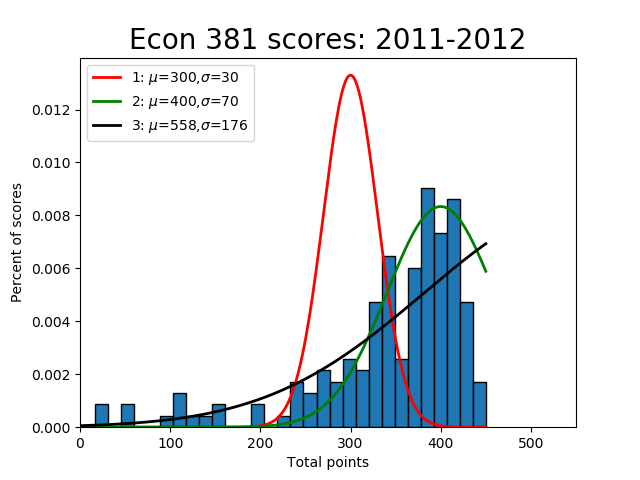

In [1]:
import requests
from IPython.display import Image

# Download and save the data file MLEplots.png
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/SMM/images/MLEplots.png')
image_file = requests.get(url, allow_redirects=True)
open('images/MLEplots.png', 'wb').write(image_file.content)
Image('images/MLEplots.png')

### 4.1.1. Two moments, identity weighting matrix
Let's try estimating the parameters $\mu$ and $\sigma$ from the truncated normal distribution by SMM. What moments should we use? Let's try the mean and variance of the data. These two statistics of the data are defined by:

$$ mean(scores_i) = \frac{1}{N}\sum_{i=1}^N scores_i $$

$$ var(scores_i) = \frac{1}{N-1}\sum_{i=1}^{N} \left(scores_i - mean(scores_i)\right)^2 $$

So the data moment vector $m(x)$ for SMM is the following.

$$ m(scores_i) \equiv \begin{bmatrix} mean(scores_i) \\ var(scores_i) \end{bmatrix} $$

And the model moment vector $m(x|\theta)$ for GMM is the following.

$$ m(scores_i|\mu,\sigma) \equiv \begin{bmatrix} mean(scores_i|\mu,\sigma) \\ var(scores_i|\mu,\sigma) \end{bmatrix} $$

But let's assume that we need to simulate the data from the model (test scores) $S$ times in order to get the model moments. In this case, we don't need to simulate. But we will do so to show how SMM works.

What would one simulation (the $s$th simulation) of the test scores look like? There are 161 test score observations in the data file `Econ381totpts.txt`. So one simulation (the $s$th simulation) would be a draw of 161 test scores from a truncated normal distribution with parameters $\mu$, $\sigma$, and $cutoff=450$.

In [2]:
# Import packages and load the data
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

In [3]:
# Download and save the data file Econ381totpts.txt
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/SMM/data/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects=True)
open('data/Econ381totpts.txt', 'wb').write(data_file.content)

# Load the data as a NumPy array
pts = np.loadtxt('data/Econ381totpts.txt')

Let random variable $y\sim N(\mu,\sigma)$ be distributed normally with mean $\mu$ and standard deviation $\sigma$ with PDF given by $\phi(y|\mu,\sigma)$ and CDF given by $\Phi(y|\mu,\sigma)$. The truncated normal distribution of random variable $x\in(a,b)$ based on $y$ but with cutoff values of $a\geq -\infty$ as a lower bound and $a < b\leq\infty$ as an upper bound has the following probability density function.

$$ f(x|\mu,\sigma,a,b) = \begin{cases} 0 \quad\text{if}\quad x\leq a \\ \frac{\phi(x|\mu,\sigma)}{\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)}\quad\text{if}\quad a < x < b \\ 0 \quad\text{if}\quad x\geq b \end{cases} $$

The CDF of the truncated normal can be shown to be the following:

$$ F(x|\mu,\sigma,a,b) = \begin{cases} 0 \quad\text{if}\quad x\leq a \\ \frac{\Phi(x|\mu,\sigma) - \Phi(a|\mu,\sigma)}{\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)}\quad\text{if}\quad a < x < b \\ 0 \quad\text{if}\quad x\geq b \end{cases} $$

The inverse CDF of the truncated normal takes a value $p$ between 0 and 1 and solves for the value of $x$ for which $p=F(x|\mu,\sigma,a,b)$. The expression for the inverse CDF of the truncated normal is the following:

$$ x = \Phi^{-1}(z|\mu,\sigma) \quad\text{where}\quad z = p\Bigl[\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)\Bigr] + \Phi(a|\mu,\sigma) $$

Note that $z$ is just a transformation of $p$ such that $z\sim U\Bigl(\Phi^{-1}(a|\mu,\sigma), \Phi^{-1}(b|\mu,\sigma)\Bigr)$.

In [4]:
# Define function that generates values of a normal pdf
def trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

In [5]:
# Define function that draws N x S test score values from a truncated
# normal distribution
def trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Draw (N x S) matrix of random draws from a truncated normal
    distribution based on a normal distribution with mean mu and
    standard deviation sigma and cutoffs (cut_lb, cut_ub). These draws
    correspond to an (N x S) matrix of randomly generated draws from a
    uniform distribution U(0,1).
    --------------------------------------------------------------------
    INPUTS:
    unif_vals = (N, S) matrix, (N,) vector, or scalar in (0,1), random
                draws from uniform U(0,1) distribution
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        scipy.stats.norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    cut_ub_cdf  = scalar in [0, 1], cdf of N(mu, sigma) at upper bound
                  cutoff of truncated normal distribution
    cut_lb_cdf  = scalar in [0, 1], cdf of N(mu, sigma) at lower bound
                  cutoff of truncated normal distribution
    unif2_vals  = (N, S) matrix, (N,) vector, or scalar in (0,1),
                  rescaled uniform derived from original.
    tnorm_draws = (N, S) matrix, (N,) vector, or scalar in (0,1),
                  values drawn from truncated normal PDF with base
                  normal distribution N(mu, sigma) and cutoffs
                  (cut_lb, cut_ub)
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: tnorm_draws
    --------------------------------------------------------------------
    '''
    # No cutoffs: truncated normal = normal
    if (cut_lb == None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = 0.0
    # Lower bound truncation, no upper bound truncation
    elif (cut_lb != None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    # Upper bound truncation, no lower bound truncation
    elif (cut_lb == None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = 0.0
    # Lower bound and upper bound truncation
    elif (cut_lb != None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    
    unif2_vals = unif_vals * (cut_ub_cdf - cut_lb_cdf) + cut_lb_cdf
    tnorm_draws = sts.norm.ppf(unif2_vals, loc=mu, scale=sigma)
    
    return tnorm_draws

What would one simulation of 161 test scores look like from a truncated normal with mean $\mu=300$, $\sigma=30$?

Mean score = 298.62472713760906
Variance of scores = 842.0928296405231
Standard deviation of scores = 29.018835773347682


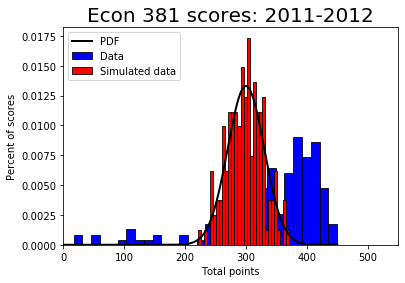

In [6]:
mu_1 = 300.0
sig_1 = 30.0
cut_lb_1 = 0.0
cut_ub_1 = 450.0
unif_vals_1 = sts.uniform.rvs(0, 1, size=161)
draws_1 = trunc_norm_draws(unif_vals_1, mu_1, sig_1,
                           cut_lb_1, cut_ub_1)
print('Mean score =', draws_1.mean())
print('Variance of scores =', draws_1.var())
print('Standard deviation of scores =', draws_1.std())

# Plot data histogram vs. simulated data histogram
count_d, bins_d, ignored_d = \
    plt.hist(pts, 30, density=True, color='b', edgecolor='black',
             linewidth=0.8, label='Data')
count_m, bins_m, ignored_m = \
    plt.hist(draws_1, 30, density=True, color='r', edgecolor='black',
             linewidth=0.8, label='Simulated data')
xvals = np.linspace(0, 450, 500)
plt.plot(xvals, trunc_norm_pdf(xvals, mu_1, sig_1, cut_lb_1, cut_ub_1),
         linewidth=2, color='k', label='PDF')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"
plt.legend(loc='upper left')

From that simulation, we can calculate moments from the simulated data just like we did from the actual data.

In [7]:
def data_moments2(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for SMM
    (mean(data), variance(data)) from both the actual data and from the
    simulated data.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N, S) matrix or (N,) vector, or scalar in (cut_lb, cut_ub),
            test scores data, either real world or simulated. Real world
            data will come in the form (N,). Simulated data comes in the
            form (N,) or (N, S).
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar or (S,) vector, mean value of test scores data
    var_data  = scalar > 0 or (S,) vector, variance of test scores data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        mean_data = xvals.mean()
        var_data = xvals.var()
    elif xvals.ndim == 2:
        mean_data = xvals.mean(axis=0)
        var_data = xvals.var(axis=0)
    
    return mean_data, var_data

In [8]:
mean_data, var_data = data_moments2(pts)
print('Data mean =', mean_data)
print('Data variance =', var_data)
mean_sim, var_sim = data_moments2(draws_1)
print('Sim. mean =', mean_sim)
print('Sim. variance =', var_sim)

Data mean = 341.90869565217395
Data variance = 7827.997292398056
Sim. mean = 298.62472713760906
Sim. variance = 842.0928296405231


We can also simulate many $(S)$ data sets of test scores, each with $N=161$ test scores. The estimate of the model moments will be the average of the simulated data moments across the simulations.

In [9]:
N = 161
S = 100
mu_2 = 300.0
sig_2 = 30.0
cut_lb = 0.0
cut_ub = 450.0
np.random.seed(25)  # Set the random number seed so it gives same answers every time
unif_vals_2 = sts.uniform.rvs(0, 1, size=(N, S))
draws_2 = trunc_norm_draws(unif_vals_2, mu_2, sig_2,
                           cut_lb, cut_ub)

mean_sim, var_sim = data_moments2(draws_2)
print(mean_sim)
print(var_sim)
mean_mod = mean_sim.mean()
var_mod = var_sim.mean()
print('Estimated model mean =', mean_mod)
print('Estimated model variance =', var_mod)

[299.17667999 298.61052796 304.45608507 301.37072845 299.66868577
 303.44257561 298.68174796 297.94014672 297.47566228 299.63490045
 298.57207266 299.13235013 296.63826526 300.44460537 302.98678012
 301.09166082 302.89663118 301.50056988 299.56091107 301.94919604
 296.58486163 300.109284   303.35295389 300.4763979  298.52345697
 299.37526236 298.54462388 301.20756546 301.23182905 297.92082255
 302.0881712  300.37792528 302.69523093 298.92838232 296.03376169
 299.9335839  302.69026345 302.0934371  299.70288418 300.88610536
 304.86283252 299.10407269 303.11654222 302.07027394 299.29923542
 298.74552083 297.79965311 301.59852312 300.15616963 301.59864217
 295.52781074 303.98090953 300.31248226 301.44867717 297.78114307
 302.64825256 303.68061798 300.12495043 299.80104697 305.78334207
 300.95811329 297.94097772 303.02458302 300.24287686 305.55084554
 296.62551538 301.73820461 303.91841652 305.97485316 300.25235036
 298.6490962  299.80907094 301.66541992 298.66699545 298.68524191
 301.45696

Our SMM model moments $\hat{m}(\tilde{scores}_i|\mu,\sigma)$ are an estimate of the true models moments that we got in the GMM case by integrating using the PDF of the truncated normal distribution. Our SMM moments we got by simulating the data $S$ times and taking the average of the simulated data moments across the simulations as our estimator of the model moments.

Define the error vector as the vector of percent deviations of the model moments from the data moments.

$$ e(\tilde{scores}_i,scores_i|\mu,\sigma) \equiv \frac{\hat{m}(\tilde{scores}_i|\mu,\sigma) - m(scores_i)}{m(scores_i)} $$

The SMM estimator for this moment vector is the following.

$$ (\hat{\mu}_{SMM},\hat{\sigma}_{SMM}) = (\mu,\sigma):\quad \min_{\mu,\sigma} e(\tilde{scores}_i,scores_i|\mu,\sigma)^T \, W \, e(\tilde{scores}_i,scores_i|\mu,\sigma) $$

Now let's define a criterion function that takes as inputs the parameters and the estimator for the weighting matrix $\hat{W}$.

In [10]:
def err_vec2(data_vals, unif_vals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for SMM.
    --------------------------------------------------------------------
    INPUTS:
    data_vals = (N,) vector, test scores data
    sim_vals  = (N, S) matrix, S simulations of test scores data
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_draws()
        data_moments()
        
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, estimated mean value from model
    var_model  = scalar > 0, estimated variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    mean_data, var_data = data_moments2(data_vals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_sim, var_sim = data_moments2(sim_vals)
    mean_model = mean_sim.mean()
    var_model = var_sim.mean()
    moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the SMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params    = (2,) vector, ([mu, sigma])
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    args      = length 5 tuple,
                (xvals, unif_vals, cut_lb, cut_ub, W_hat)
    xvals     = (N,) vector, values of the truncated normally
                distributed random variable
    unif_vals = (N, S) matrix, matrix of draws from U(0,1) distribution.
                This fixes the seed of the draws for the simulations
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    W_hat     = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec2()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, unif_vals, cut_lb, cut_ub, W_hat = args
    err = err_vec2(xvals, unif_vals, mu, sigma, cut_lb, cut_ub,
                  simple=False)
    crit_val = err.T @ W_hat @ err 
    
    return crit_val

In [11]:
mu_test = 400
sig_test = 70
cut_lb = 0.0
cut_ub = 450.0
# unif_vals_2 = sts.uniform.rvs(0, 1, size=(N, S))
sim_vals = trunc_norm_draws(unif_vals_2, mu_test, sig_test, cut_lb, cut_ub)
mean_sim, var_sim = data_moments2(sim_vals)
mean_mod = mean_sim.mean()
var_mod = var_sim.mean()
print(mean_mod, var_mod)
err_vec2(pts, sim_vals, mu_test, sig_test, cut_lb, cut_ub, simple=False)
crit_test = criterion(np.array([mu_test, sig_test]), pts, unif_vals_2,
                      0.0, 450.0, np.eye(2))
print(crit_test)

372.0777280048037 2663.8708280174988
[[0.44298931]]


Now we can perform the SMM estimation. Let's start with the identity matrix as our estimate for the optimal weighting matrix $W = I$.

In [12]:
mu_init_1 = 300
sig_init_1 = 30
params_init_1 = np.array([mu_init_1, sig_init_1])
W_hat1_1 = np.eye(2)
smm_args1_1 = (pts, unif_vals_2, cut_lb, cut_ub, W_hat1_1)
results1_1 = opt.minimize(criterion, params_init_1, args=(smm_args1_1),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)))
mu_SMM1_1, sig_SMM1_1 = results1_1.x
print('mu_SMM1_1=', mu_SMM1_1, ' sig_SMM1_1=', sig_SMM1_1)

mu_SMM1_1= 612.342179756052  sig_SMM1_1= 197.26560601962547


In [13]:
mean_data, var_data = data_moments2(pts)
print('Data mean of scores =', mean_data, ', Data variance of scores =', var_data)
sim_vals_1 = trunc_norm_draws(unif_vals_2, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub)
mean_sim_1, var_sim_1 = data_moments2(sim_vals_1)
mean_model_1 = mean_sim_1.mean()
var_model_1 = var_sim_1.mean()
err_1 = err_vec2(pts, sim_vals_1, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub,
                False).reshape(2,)

print('Model mean 1 =', mean_model_1, ', Model variance 1 =', var_model_1)
print('Error vector 1 =', err_1)
print(results1_1)

Data mean of scores = 341.90869565217395 , Data variance of scores = 7827.997292398056
Model mean 1 = 341.6694082524975 , Model variance 1 = 7827.8618757146305
Error vector 1 = [nan nan]
      fun: array([[4.90099918e-07]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.41228601e-07,  2.34145023e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 72
      nit: 17
   status: 0
  success: True
        x: array([612.34217976, 197.26560602])


Let's plot the PDF implied by these results against the histogram.

array([ 17.        ,  31.42666667,  45.85333333,  60.28      ,
        74.70666667,  89.13333333, 103.56      , 117.98666667,
       132.41333333, 146.84      , 161.26666667, 175.69333333,
       190.12      , 204.54666667, 218.97333333, 233.4       ,
       247.82666667, 262.25333333, 276.68      , 291.10666667,
       305.53333333, 319.96      , 334.38666667, 348.81333333,
       363.24      , 377.66666667, 392.09333333, 406.52      ,
       420.94666667, 435.37333333, 449.8       ])

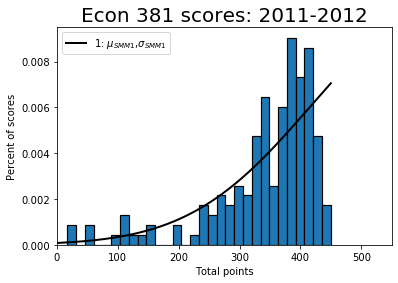

In [14]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, density=True,
                                edgecolor='black', linewidth=1.2)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(0, 450, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM1_1, sig_SMM1_1, 0.0, 450.0),
         linewidth=2, color='k', label='1: $\mu_{SMM1}$,$\sigma_{SMM1}$')
plt.legend(loc='upper left')
bins

That looks just like the ML estimate from the previous notebook. Let's see what the criterion function looks like for different values of $\mu$ and $\sigma$.

Text(0.5, 0, 'Crit. func.')

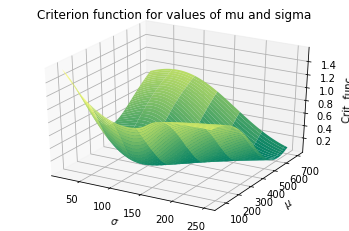

In [15]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(60, 700, 50)
sig_vals = np.linspace(20, 250, 50)
# mu_vals = np.linspace(600, 610, 50)
# sig_vals = np.linspace(190, 196, 50)
crit_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals[mu_ind, sig_ind] = \
            criterion(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      pts, unif_vals_2, cut_lb, cut_ub, W_hat1_1)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

Let's compute the SMM estimator for the variance-covariance matrix $\hat{\Sigma}_{SMM}$ of our SMM estimates $\hat{\theta}_{SMM}$ using the equation in Section 3 based on the Jacobian $d(\tilde{x},x|\hat{\theta}_{SMM})$ of the moment error vector $e(\tilde{x},x|\hat{\theta}_{SMM})$ from the criterion function at the estimated (optimal) parameter values $\hat{\theta}_{SMM}$. We first write a function that computes the Jacobian $d(x|\hat{\theta}_{SMM})$.

In [16]:
def Jac_err2(data_vals, unif_vals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    This function computes the Jacobian matrix of partial derivatives of the R x 1 moment
    error vector e(x|theta) with respect to the K parameters theta_i in the K x 1 parameter vector
    theta. The resulting matrix is R x K Jacobian.
    '''
    Jac_err = np.zeros((2, 2))
    h_mu = 1e-4 * mu
    h_sig = 1e-4 * sigma
    Jac_err[:, 0] = \
        ((err_vec2(xvals, unif_vals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
          err_vec2(xvals, unif_vals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) / (2 * h_mu)).flatten()
    Jac_err[:, 1] = \
        ((err_vec2(xvals, unif_vals, mu, sigma + h_sig, cut_lb, cut_ub, simple) -
          err_vec2(xvals, unif_vals, mu, sigma - h_sig, cut_lb, cut_ub, simple)) / (2 * h_sig)).flatten()
    
    return Jac_err

In [17]:
S = unif_vals_2.shape[1]
d_err2 = Jac_err2(pts, unif_vals_2, mu_SMM1_1, sig_SMM1_1, 0.0, 450.0, False)
print(d_err2)
print(W_hat1_1)
SigHat2 = (1 / S) * lin.inv(d_err2.T @ W_hat1_1 @ d_err2)
print(SigHat2)
print('Std. err. mu_hat=', np.sqrt(SigHat2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat2[1, 1]))

[[ 0.00089748 -0.00290432]
 [-0.00114131  0.00445697]]
[[1. 0.]
 [0. 1.]]
[[602569.14116544 163810.21465827]
 [163810.21465827  44885.65604294]]
Std. err. mu_hat= 776.2532712751926
Std. err. sig_hat= 211.86235164120674


#### 4.1.2. Two moments, two-step optimal weighting matrix
Similar to the ML problem, it looks like the criterion function is roughly equal for a specific portion increase of $\mu$ and $\sigma$ together. That is, with these two moments probably have a correspondence of values of $\mu$ and $\sigma$ that give roughly the same criterion function value. This issue has two possible solutions.

1. Maybe we need the two-step variance covariance estimator to calculate a "more" optimal weighting matrix $W$.
2. Maybe our two moments aren't very good moments for fitting the data.

Let's first try the two-step weighting matrix.

In [18]:
def get_Err_mat2(pts, unif_vals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    --------------------------------------------------------------------
    This function computes the R x S matrix of errors from each
    simulated moment for each moment error. In this function, we have
    hard coded R = 2.
    --------------------------------------------------------------------
    INPUTS:
    xvals     = (N,) vector, test scores data
    unif_vals = (N, S) matrix, uniform random variables that generate
                the N observations of simulated data for S simulations
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    cut_lb    = scalar or string, ='None' if no cutoff is given,
                otherwise is scalar lower bound value of distribution.
                Values below this value have zero probability
    cut_ub    = scalar or string, ='None' if no cutoff is given,
                otherwise is scalar upper bound value of distribution.
                Values above this value have zero probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        model_moments()
    
    OBJECTS CREATED WITHIN FUNCTION:
    R          = integer = 2, hard coded number of moments
    S          = integer >= R, number of simulated datasets
    Err_mat    = (R, S) matrix, error by moment and simulated data
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: Err_mat
    --------------------------------------------------------------------
    '''
    R = 2
    S = unif_vals.shape[1]
    Err_mat = np.zeros((R, S))
    mean_data, var_data = data_moments2(pts)
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    mean_model, var_model = data_moments2(sim_vals)
    if simple:
        Err_mat[0, :] = mean_model - mean_data
        Err_mat[1, :] = var_model - var_data
    else:
        Err_mat[0, :] = (mean_model - mean_data) / mean_data
        Err_mat[1, :] = (var_model - var_data) / var_data
    
    return Err_mat

In [19]:
Err_mat2 = get_Err_mat2(pts, unif_vals_2, mu_SMM1_1, sig_SMM1_1, 0.0, 450.0, False)
VCV2 = (1 / unif_vals_2.shape[1]) * (Err_mat2 @ Err_mat2.T)
print(VCV2)
W_hat2_1 = lin.inv(VCV2)
print(W_hat2_1)

[[ 0.0003341  -0.00142289]
 [-0.00142289  0.01592884]]
[[4830.91749547  431.53677995]
 [ 431.53677995  101.32759549]]


In [20]:
params_init2_1 = np.array([mu_SMM1_1, sig_SMM1_1])
smm_args2_1 = (pts, unif_vals_2, cut_lb, cut_ub, W_hat2_1)
results2_1 = opt.minimize(criterion, params_init2_1, args=(smm_args2_1),
                         method='L-BFGS-B',
                         bounds=((1e-10, None), (1e-10, None)))
mu_SMM2_1, sig_SMM2_1 = results2_1.x
print('mu_SMM2_1=', mu_SMM2_1, ' sig_SMM2_1=', sig_SMM2_1)

mu_SMM2_1= 619.430314736335  sig_SMM2_1= 199.07478370142596


Look at how much smaller (more efficient) the estimated standard errors are in this case with the two-step optimal weighting matrix $\hat{W}_{2step}$.

In [21]:
d_err2_2 = Jac_err2(pts, unif_vals_2, mu_SMM2_1, sig_SMM2_1, 0.0, 450.0, False)
print(d_err2_2)
print(W_hat2_1)
SigHat2_2 = (1 / S) * lin.inv(d_err2_2.T @ W_hat2_1 @ d_err2_2)
print(SigHat2_2)
print('Std. err. mu_hat=', np.sqrt(SigHat2_2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat2_2[1, 1]))

[[ 0.00088129 -0.00288863]
 [-0.0011259   0.00443426]]
[[4830.91749547  431.53677995]
 [ 431.53677995  101.32759549]]
[[2397.38645019  745.29858907]
 [ 745.29858907  232.01817018]]
Std. err. mu_hat= 48.963113158664044
Std. err. sig_hat= 15.232142665284327


#### 4.1.3. Four moments, identity matrix weighting matrix
Using a better weighting matrix didn't improve our estimates or fit very much, but it did improve our standard errors. But even with the optimal weighting matrix, our standard errors still look pretty big. This might mean that we did not choose good moments for fitting the data. Let's try some different moments. How about four moments to match.

1. The percent of observations greater than 430 (between 430 and 450)
2. The percent of observations between 320 and 430
3. The percent of observations between 220 and 320
4. The percent of observations less than 220 (between 0 and 220)

In [22]:
def data_moments4(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for SMM
    (binpct_1, binpct_2, binpct_3, binpct_4) from both the actual data
    and from the simulated data.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N, S) matrix, (N,) vector, or scalar in (cut_lb, cut_ub),
            test scores data, either real world or simulated. Real world
            data will come in the form (N,). Simulated data comes in the
            form (N,) or (N, S).

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1 = scalar in [0, 1] or (S,) vector, percent of observations
             0 <= x < 220
    bpct_2 = scalar in [0, 1] or (S,) vector, percent of observations
             220 <= x < 320
    bpct_3 = scalar in [0, 1] or (S,) vector, percent of observations
             320 <= x < 430
    bpct_4 = scalar in [0, 1] or (S,) vector, percent of observations
             430 <= x <= 450

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3, bpct_4
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        bpct_1 = (xvals < 220).sum() / xvals.shape[0]
        bpct_2 = ((xvals >=220) & (xvals < 320)).sum() / xvals.shape[0]
        bpct_3 = ((xvals >=320) & (xvals < 430)).sum() / xvals.shape[0]
        bpct_4 = (xvals >= 430).sum() / xvals.shape[0]
    if xvals.ndim == 2:
        bpct_1 = (xvals < 220).sum(axis=0) / xvals.shape[0]
        bpct_2 = (((xvals >=220) & (xvals < 320)).sum(axis=0) /
                    xvals.shape[0])
        bpct_3 = (((xvals >=320) & (xvals < 430)).sum(axis=0) /
                    xvals.shape[0])
        bpct_4 = (xvals >= 430).sum(axis=0) / xvals.shape[0]

    return bpct_1, bpct_2, bpct_3, bpct_4

In [23]:
def err_vec4(data_vals, unif_vals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for SMM.
    --------------------------------------------------------------------
    INPUTS:
    data_vals = (N,) vector, test scores data
    unif_vals = (N, S) matrix, uniform values that generate S
                simulations of N observations
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (4, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(data_vals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_sim, bpct_2_sim, bpct_3_sim, bpct_4_sim = \
        data_moments4(sim_vals)
    bpct_1_mod = bpct_1_sim.mean()
    bpct_2_mod = bpct_2_sim.mean()
    bpct_3_mod = bpct_3_sim.mean()
    bpct_4_mod = bpct_4_sim.mean()
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

In [24]:
def criterion4(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the SMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params    = (2,) vector, ([mu, sigma])
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    args      = length 5 tuple,
                (xvals, unif_vals, cut_lb, cut_ub, W_hat)
    xvals     = (N,) vector, values of the truncated normally
                distributed random variable
    unif_vals = (N, S) matrix, matrix of draws from U(0,1) distribution.
                This fixes the seed of the draws for the simulations
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    W_hat     = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, unif_vals, cut_lb, cut_ub, W_hat = args
    
    # # These next two lines diagnose a problems in the next frame 
    # print('mu=', mu)
    # print('sigma', sigma)
    
    err = err_vec4(xvals, unif_vals, mu, sigma, cut_lb, cut_ub,
                   simple=False)
    crit_val = err.T @ W_hat @ err
    
    return crit_val

Now we will execute the SMM minimization problem, but a strange issue will arise. And the issue has to do with the minimizer.

In [25]:
mu_init4_1 = 300
sig_init4_1 = 30
params_init4_1 = np.array([mu_init4_1, sig_init4_1])
W_hat4_1 = np.eye(4)
smm_args4_1 = (pts, unif_vals_2, 0.0, 450, W_hat4_1)
results4_1 = opt.minimize(criterion4, params_init4_1, args=(smm_args4_1),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)))
mu_SMM4_1, sig_SMM4_1 = results4_1.x
print('mu_SMM4_1=', mu_SMM4_1, ' sig_SMM4_1', sig_SMM4_1)
print(results4_1)

mu_SMM4_1= 300.0  sig_SMM4_1 30.0
      fun: array([[12.83620605]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([300.,  30.])


Note that the optimization problem only did three function evaluations, and it decided that the parameter values that minimized the criterion function are the initial values. Something is wrong.

To see what is happening in the minimizer, let's insert a line in the `criterion4()` function that prints out the values of $\mu$ and $\sigma$ for each function evaluation in the minimizer as well as the error vector associated with each guess of $\mu$ and $\sigma$.

Note that the three function evaluations are for guesses of $\mu$ and $\sigma$ of:

* Guess 1: $\mu$=`mu_init` and $\sigma$=`sig_init`
* Guess 2: $\mu$=`mu_init + 0.00000001` and $\sigma$=`sig_init`
* Guess 3: $\mu$=`mu_init` and $\sigma$=`sig_init + 0.00000001`

This is the `L-BFGS-B` method's way of computing the Jacobian or slope (gradient) matrix of the criterion function by finite difference. However, the epsilon of `0.00000001` seems to be too small. We can set this step size to be bigger by using the `minimize()` function's `options={}` argument.

The `options={}` argument in the `minimize()` function is a dictionary of solver options available to each particular method. In our case, we want to look at the `options={}` arguments for the [`L-BFGS-B` method](https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb) of the `scipy.minimize()` function. Looking at this documentation, we find that we can set the `eps` option to something other than its default which is `options={'eps': 1e-08}`. In our case, we want to set that epsilon value used the finite differnce estimation of the Jacobian to be something bigger. Our means and variances seem to be in the 100's, so let's see if we get a solution setting the epsilon equal to 1.0.

In [26]:
results4_1 = opt.minimize(criterion4, params_init4_1, args=(smm_args4_1),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)),
                          options={'eps': 1.0})
mu_SMM4_1, sig_SMM4_1 = results4_1.x
print('mu_SMM4_1=', mu_SMM4_1, ' sig_SMM4_1', sig_SMM4_1)
print(results4_1)

mu_SMM4_1= 362.560593472098  sig_SMM4_1 46.5751519565219
      fun: array([[0.98195143]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00284539, -0.00102224])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 8
   status: 0
  success: True
        x: array([362.56059347,  46.57515196])


Let's plot the PDF implied by these results against the histogram of the data.

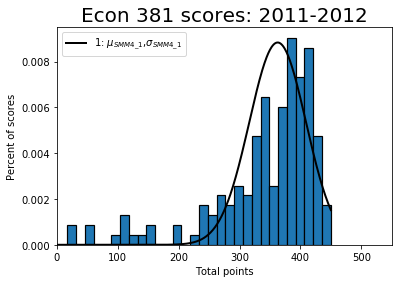

In [27]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, density=True,
                                edgecolor='black', linewidth=1.2)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(cut_lb, cut_ub, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM4_1, sig_SMM4_1,
         cut_lb, cut_ub), linewidth=2, color='k',
         label='1: $\mu_{SMM4\_1}$,$\sigma_{SMM4\_1}$')
plt.legend(loc='upper left')

Let's print the data moments and the model moments as well as the error vector evaluated at the SMM estimates.

In [28]:
bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data = data_moments4(pts)
print(bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data)
sim_vals4_1 = trunc_norm_draws(unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450)
bpct_1_sim4_1, bpct_2_sim4_1, bpct_3_sim4_1, bpct_4_sim4_1 = data_moments4(sim_vals4_1)
bpct_1_model4_1 = bpct_1_sim4_1.mean()
bpct_2_model4_1 = bpct_2_sim4_1.mean()
bpct_3_model4_1 = bpct_3_sim4_1.mean()
bpct_4_model4_1 = bpct_4_sim4_1.mean()
print(bpct_1_model4_1, bpct_2_model4_1, bpct_3_model4_1, bpct_4_model4_1)
err4_1 = err_vec4(pts, unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450,
                  False)
crit_params = np.array([mu_SMM4_1, sig_SMM4_1])
criterion4_1 = criterion4(crit_params, pts, unif_vals_2, 0.0, 450, W_hat4_1)
print('Error vector =', err4_1.reshape(4,))
print('Criterion=', criterion4_1)

0.08695652173913043 0.17391304347826086 0.6894409937888198 0.049689440993788817
0.0017391304347826085 0.1820496894409938 0.7702484472049688 0.04596273291925465
Error vector = [-0.98        0.04678571  0.11720721 -0.075     ]
Criterion= [[0.98195143]]


We can compute the estimator of the variance-covariance matrix $\hat{\Sigma}$ of the SMM parameter estimator by computing the Jacobian of the error vector. In this case, the Jacobian $d(\tilde{x},x|\theta)$ is $R\times K = 4\times 2$.

In [29]:
def Jac_err4(data_vals, unif_vals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    This function computes the Jacobian matrix of partial derivatives of the R x 1 moment
    error vector e(x|theta) with respect to the K parameters theta_i in the K x 1 parameter vector
    theta. The resulting matrix is R x K Jacobian.
    '''
    Jac_err = np.zeros((4, 2))
    h_mu = 1e-4 * mu
    h_sig = 1e-4 * sigma
    Jac_err[:, 0] = \
        ((err_vec4(data_vals, unif_vals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
          err_vec4(data_vals, unif_vals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) / (2 * h_mu)).flatten()
    Jac_err[:, 1] = \
        ((err_vec4(data_vals, unif_vals, mu, sigma + h_sig, cut_lb, cut_ub, simple) -
          err_vec4(data_vals, unif_vals, mu, sigma - h_sig, cut_lb, cut_ub, simple)) / (2 * h_sig)).flatten()
    
    return Jac_err

In [31]:
print(d_err4_1)

[[ 0.          0.        ]
 [-0.05417814  0.07668099]
 [ 0.01242414 -0.01934295]
 [ 0.0172385   0.        ]]


In [54]:
def my_jacbo(data_vals, unif_vals, mu, sigma, cut_lb, cut_ub, simple=False):
    h_mu = 1e-4 * mu
    h_sig = 1e-4 * sigma
    
    evec_mu = ((err_vec4(data_vals, unif_vals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
          err_vec4(data_vals, unif_vals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) / (2 * h_mu)).flatten()
    evec_sigma =   ((err_vec4(data_vals, unif_vals, mu, sigma + h_sig, cut_lb, cut_ub, simple) -
          err_vec4(data_vals, unif_vals, mu, sigma - h_sig, cut_lb, cut_ub, simple)) / (2 * h_sig)).flatten()
    
    jdf = pd.DataFrame({"1": evec_mu, "2": list(evec_sigma)})
    return np.array(jdf)

In [47]:
data_vals, unif_vals, mu, sigma, cut_lb, cut_ub=pts, unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450.0
simple = False
h_mu = 1e-4 * mu
h_sig = 1e-4 * sigma

In [48]:
evec_mu = (err_vec4(data_vals, unif_vals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
          err_vec4(data_vals, unif_vals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) / (2 * h_mu).flatten()

In [50]:
evec_mu.flatten()

array([ 0.        , -0.05417814,  0.01242414,  0.0172385 ])

In [55]:
test = my_jacbo(pts, unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450.0, False)

In [57]:
SigHat4_1 = (1 / S) * lin.inv(test.T @ W_hat4_1 @ test)
print(SigHat4_1)

[[33.48770545 23.53170341]
 [23.53170341 18.13459776]]


In [30]:
d_err4_1 = Jac_err4(pts, unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450.0, False)
print(d_err4_1)
print(W_hat4_1)
SigHat4_1 = (1 / S) * lin.inv(d_err4_1.T @ W_hat4_1 @ d_err4_1)
print(SigHat4_1)
print('Std. err. mu_hat=', np.sqrt(SigHat4_1[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat4_1[1, 1]))

[[ 0.          0.        ]
 [-0.05417814  0.07668099]
 [ 0.01242414 -0.01934295]
 [ 0.0172385   0.        ]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[33.48770545 23.53170341]
 [23.53170341 18.13459776]]
Std. err. mu_hat= 5.786856266717126
Std. err. sig_hat= 4.258473642422245


#### 4.1.4. Four moments, two-step optimal weighting matrix
Let's see how much things change if we use the two-step estimator for the optimal weighting matrix $W$ instead of the identity matrix.

In [ ]:
def get_Err_mat4(pts, unif_vals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    --------------------------------------------------------------------
    This function computes the R x S matrix of errors from each
    simulated moment for each moment error. In this function, we have
    hard coded R = 4.
    --------------------------------------------------------------------
    INPUTS:
    xvals     = (N,) vector, test scores data
    unif_vals = (N, S) matrix, uniform random variables that generate
                the N observations of simulated data for S simulations
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    cut_lb    = scalar or string, ='None' if no cutoff is given,
                otherwise is scalar lower bound value of distribution.
                Values below this value have zero probability
    cut_ub    = scalar or string, ='None' if no cutoff is given,
                otherwise is scalar upper bound value of distribution.
                Values above this value have zero probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        model_moments()
    
    OBJECTS CREATED WITHIN FUNCTION:
    R          = integer = 4, hard coded number of moments
    S          = integer >= R, number of simulated datasets
    Err_mat    = (R, S) matrix, error by moment and simulated data
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: Err_mat
    --------------------------------------------------------------------
    '''
    R = 4
    S = unif_vals.shape[1]
    Err_mat = np.zeros((R, S))
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = data_moments4(pts)
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    bpct_1_sim, bpct_2_sim, bpct_3_sim, bpct_4_sim = data_moments4(sim_vals)
    if simple:
        Err_mat[0, :] = bpct_1_sim - bpct_1_dat
        Err_mat[1, :] = bpct_2_sim - bpct_2_dat
        Err_mat[2, :] = bpct_3_sim - bpct_3_dat
        Err_mat[3, :] = bpct_4_sim - bpct_4_dat
    else:
        Err_mat[0, :] = (bpct_1_sim - bpct_1_dat) / bpct_1_dat
        Err_mat[1, :] = (bpct_2_sim - bpct_2_dat) / bpct_2_dat
        Err_mat[2, :] = (bpct_3_sim - bpct_3_dat) / bpct_3_dat
        Err_mat[3, :] = (bpct_4_sim - bpct_4_dat) / bpct_4_dat
    
    return Err_mat

In [ ]:
Err_mat4 = get_Err_mat4(pts, unif_vals_2, mu_SMM4_1, sig_SMM4_1, 0.0, 450.0, False)
VCV4 = (1 / S) * (Err_mat4 @ Err_mat4.T)
print(VCV4)
# Because VCV4 is poorly conditioned we use the pseudo-inverse to invert it, which
# uses the SVD
W_hat4_2 = lin.pinv(VCV4)
print(W_hat4_2)

In [ ]:
params_init4_2 = np.array([mu_SMM4_1, sig_SMM4_1])
# params_init2_2 = np.array([400, 70])
# W_hat[1, 1] = 2.0
# W_hat[2, 2] = 2.0
smm_args4_2 = (pts, unif_vals_2, 0.0, 450, W_hat4_2)
results4_2 = opt.minimize(criterion4, params_init4_2, args=(smm_args4_2),
                          method='SLSQP',
                          bounds=((1e-10, None), (1e-10, None)),
                          options={'eps': 1.0})
mu_SMM4_2, sig_SMM4_2 = results4_2.x
print('mu_SMM4_2=', mu_SMM4_2, ' sig_SMM4_2', sig_SMM4_2)
print(results4_2)

The optimal weighting matrix $\hat{W}_{2step}$ does not make a difference on the point estimates. But it will make a difference on the standard errors.

In [ ]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, density=True,
                                edgecolor='black', linewidth=1.2)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(cut_lb, cut_ub, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM4_2, sig_SMM4_2,
         0.0, 450), linewidth=2, color='k',
         label='1: $\mu_{SMM4\_2}$,$\sigma_{SMM4\_2}$')
plt.legend(loc='upper left')

In [ ]:
print(bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data)
sim_vals4_2 = trunc_norm_draws(unif_vals_2, mu_SMM4_2, sig_SMM4_2, 0.0, 450)
bpct_1_sim4_2, bpct_2_sim4_2, bpct_3_sim4_2, bpct_4_sim4_2 = data_moments4(sim_vals4_2)
bpct_1_model4_2 = bpct_1_sim4_2.mean()
bpct_2_model4_2 = bpct_2_sim4_2.mean()
bpct_3_model4_2 = bpct_3_sim4_2.mean()
bpct_4_model4_2 = bpct_4_sim4_2.mean()
print(bpct_1_model4_2, bpct_2_model4_2, bpct_3_model4_2, bpct_4_model4_2)
err4_2 = err_vec4(pts, unif_vals_2, mu_SMM4_2, sig_SMM4_2, 0.0, 450,
                  False)
crit_params = np.array([mu_SMM4_2, sig_SMM4_2])
criterion4_2 = criterion4(crit_params, pts, unif_vals_2, 0.0, 450, W_hat4_2)
print('Error vector =', err4_2.reshape(4,))
print('Criterion=', criterion4_2)

The criterion function for different values of $\mu$ and $\sigma$ here has a minimum, although it looks like there is a valley floor ridge along which values of $\mu$ and $\sigma$ produce approximately the same criterion function value.

In [ ]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(340, 380, 50)
sig_vals = np.linspace(20, 70, 50)
# mu_vals = np.linspace(350, 370, 50)
# sig_vals = np.linspace(85, 98, 50)
crit_vals4 = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals4[mu_ind, sig_ind] = \
            criterion4(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                       pts, unif_vals_2, 0.0, 450, W_hat4_2)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals4, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

As has been true in our other examples of GMM and SMM, the standard errors on the estimated parameter vector decrease substantially with the incorporation of an optimal weighting matrix.

In [ ]:
d_err4_2 = Jac_err4(pts, unif_vals_2, mu_SMM4_2, sig_SMM4_2, 0.0, 450.0, False)
print(d_err4_2)
print(W_hat4_2)
SigHat4_2 = (1 / S) * lin.inv(d_err4_2.T @ W_hat4_2 @ d_err4_2)
print(SigHat4_2)
print('Std. err. mu_hat=', np.sqrt(SigHat4_2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat4_2[1, 1]))

### 4.2. Brock and Mirman (1972) estimation by SMM
Give Brock and Mirman (1972) example.

## 5. Identification
An issue that we saw in the examples from the previous section is that there is some science as well as some art in choosing moments to identify the parameters in an SMM estimation as well as in GMM. Suppose the parameter vector $\theta$ has $K$ elements, or rather, $K$ parameters to be estimated. In order to estimate $\theta$ by GMM, you must have at least as many moments as parameters to estimate $R\geq K$. If you have exactly as many moments as parameters to be estimated $R=K$, the model is said to be *exactly identified*. If you have more moments than parameters to be estimated $R>K$, the model is said to be *overidentified*. If you have fewer moments than parameters to be estimated $R<K$, the model is said to be *underidentified*. There are good reasons to overidentify $R>K$ the model in SMM estimation as we saw in the previous example. The main reason is that not all moments are orthogonal. That is, some moments convey roughly the same information about the data and, therefore, do not separately identify any extra parameters. So a good SMM model often is overidentified $R>K$.

One last point about MM regards moment selection and verification of results. The real world has an infinite supply of potential moments that describe some part of the data. Choosing moments to estimate parameters by SMM requires understanding of the model, intuition about its connections to the real world, and artistry. A good SMM estimation will include moments that have some relation to or story about their connection to particular parameters of the model to be estimated. In addition, a good verification of a SMM estimation is to take some moment from the data that was not used in the estimation and see how well the corresponding moment from the estimated model matches that *outside moment*.

## 6. Indirect Inference
Indirect inference is a particular application of SMM with some specific characteristics. As moments to match it uses parameters of an auxiliary model that can be estimated both on the real-world data and on the simulated data. Smith (2008) gives a great summary of the topic with some examples. See also Gourieroux and Monfort (1996, ch. 4) for a textbook treatment of the topic.

### 6.1. Restatement of the general SMM estimation problem
Define a model or data generating process (DGP) as a system of equations,

$$ F(x_t,z_t|\theta)=0 $$

which are functions of a vector of endogenous variables $x_t$, exogenous variables $z_t$, and parameters $\theta$. In the general simulated method of moments (SMM), one would choose data moments $m(x_t,z_t)$ that are just statistics of the data and model moments $\hat{m}(\tilde{x}_t,\tilde{z}_t|\theta)$ that are averages of the same data moments calculated on simulated samples of the data. The SMM estimator is to choose the parameter vector $\hat{\theta}_{SMM}$ to minimize some distance of the model moments from the data moments.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta} ||\hat{m}(\tilde{x}_t,\tilde{z}_t|\theta) - m(x_t,z_t)|| $$

### 6.2. Indirect inference estimation problem
Indirect inference is to change the model moments from being stastics that are calculated directly from the simulated data to being statistics that are calculated indirectly from the simulated data. These indirect inference model moments are parameters from an auxiliary model.

Let an auxiliary model be defined as $g(x_t,z_t|\phi)=0$. The parameters of the auxiliary model will be the moments we use to identify the model parameters $\theta$. Suppose that the model parameter vector $\theta$ has $K$ elements. Then the auxiliary model parameter vector $\phi$ must have $R$ elements such that $R\geq K$. This is the typical identification restriction that the number of model moments must be at least as many as the number of model parameters being estimated.

When the auxiliary model is run on real-world data $g(x_t,z_t|\phi)=0$, the resulting values of the auxiliary model parameters are the data moments $\hat{\phi}(x_t,z_t)$. Note that these data moments $\hat{\phi}$ have a hat on them to represent that these moments are usually estimated in some way. When the auxiliary model is run on the $s$th simulation of the data given model parameters $g(\tilde{x}_{s,t},\tilde{z}_{s,t}|\phi)=0$, the auxiliary model parameters are the $s$th estimate of the model moments $\hat{\phi}_s(\tilde{x}_{s,t},\tilde{z}_{s,t}|\theta)$. The model moments are then the average of these auxiliary model parameter estimates across the simulations.

$$ \hat{\phi}(\tilde{x}_{t},\tilde{z}_{t}|\theta) = \frac{1}{S}\sum_{s=1}^S \hat{\phi}_s(\tilde{x}_{s,t},\tilde{z}_{s,t}|\theta) $$

The indirect inference estimation method is simply to choose a model parameter vector $\theta$ that minimizes some distance metric between the model moments $\hat{\phi}(\tilde{x}_{t},\tilde{z}_{t}|\theta)$ and the data moments $\hat{\phi}(x_t,z_t)$.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta} ||\hat{\phi}(\tilde{x}_{t},\tilde{z}_{t}|\theta) - \hat{\phi}(x_t,z_t)|| $$
 
In most examples of indirect, the data moments and model moments are some regression of endogenous variables on exogenous variables. In the univariate case, it is usually linear regression. In the multivariate case, it is usually a vector autoregression (VAR). But most examples are reduced form parameter estimation exercises. Other examples are probit, logit, and two-stage IV regressions. The key is that these statistics be computationally tractable and have convenient or accurate data availability.

### 6.3. Hypothesis testing with indirect inference
* Wald test
* likelihood ratio test

## 7. References
* Adda, Jerome and Russell Cooper, *Dynamic Economics: Quantitative Methods and Applications*, MIT Press (2003).
* Brock, William A. and Leonard J. Mirman, "Optimal Economic Growth and Uncertainty: The Discounted Case," *Journal of Economic Theory*, 4:3, pp. 479-513 (June 1972).
* Davidson, Russell and James G. MacKinnon, *Econometric Theory and Methods*, Oxford University Press (2004).
* Duffie, Darrell and Kenneth J. Singleton, "Simulated Moment Estimation of Markov Models of Asset Prices", *Econometrica*, 61:4, pp. 929-952 (July 1993).
* Gourieroux, Christian and Alain Monfort, *Simulation-based Econometric Methods*, Oxford University Press (1996).
* Laroque, G. and B. Salanie, "Simulation Based Estimation Models with Lagged Latent Variables", *Journal of Applied Econometrics*, 8:Supplement, pp. 119-133 (December 1993).
* Lee, Bong-Soo and Beth Fisher Ingram, "Simulation Estimation of Time Series Models", *Journal of Econometrics*, 47:2-3, pp. 197-205 (February 1991).
* McFadden, Daniel, "A Method of Simulated Moments for Estimation of Discrete Response Models without Numerical Integration," *Econometrica*, 57:5, pp. 995-1026 (September 1989).
* Newey, Whitney K. and Kenneth D. West, "A Simple, Positive, Semi-definite, Heteroskedasticy and Autocorrelation Consistent Covariance Matrix," *Econometrica*, 55:3, pp. 703-708 (May 1987).
* Smith, Anthony A. Jr., "[Indirect Inference](http://www.econ.yale.edu/smith/palgrave7.pdf)," *New Palgrave Dictionary of Economics*, 2nd edition, (2008).